In [367]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Admission_Predict.csv')

In [368]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


<Axes: >

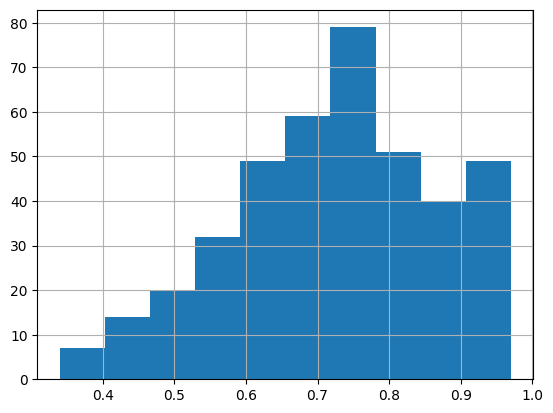

In [369]:
df['Chance of Admit '].hist()

In [370]:
df['Chance of Admit '].median()

0.73

In [371]:
df['Admit'] = df['Chance of Admit ']>0.73

In [372]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,True
396,397,325,107,3,3.0,3.5,9.11,1,0.84,True
397,398,330,116,4,5.0,4.5,9.45,1,0.91,True
398,399,312,103,3,3.5,4.0,8.78,0,0.67,False


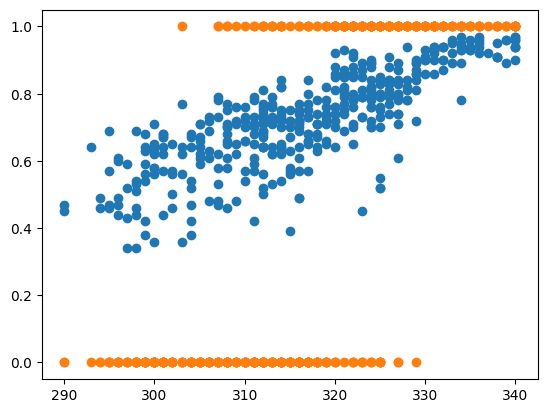

In [373]:
plt.scatter(df['GRE Score'],df['Chance of Admit '])
plt.scatter(df['GRE Score'],df['Admit'])

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [375]:
X = df['GRE Score'].to_numpy()[:,np.newaxis]
# X = df['GRE Score']
Y = df['Chance of Admit ']
Y = Y.values.reshape(-1, 1)

In [376]:
lr = LinearRegression()
LR = LogisticRegression()

In [377]:
lr.fit(X,Y)

LinearRegression()

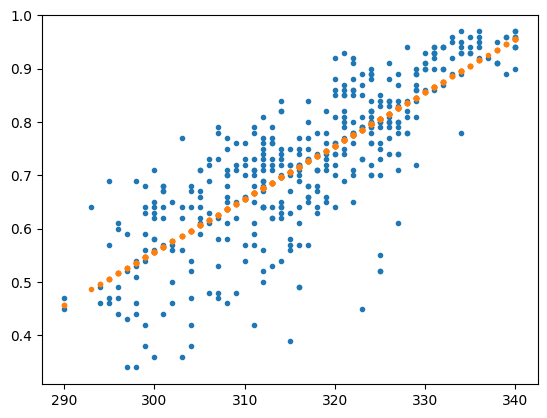

In [378]:
# This plot shows the nice linear regression fit between GRE score and Chance of admit

plt.plot(X,Y,'.')
plt.plot(X,lr.predict(X),'.')

In [379]:
#Instead of using linear regression now do logistic regression on target output classes of Admit
Y = df['Admit']
Y = Y.values

In [380]:
Y.shape

(400,)

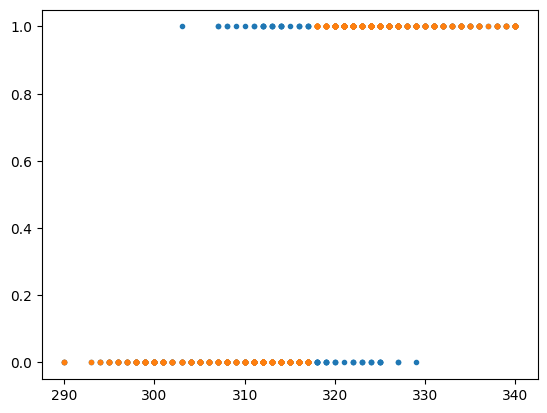

In [381]:
# this is the Logistic Regression prediction (along with ground truth)
LR.fit(X,Y)
plt.plot(X,Y,'.')
plt.plot(X,LR.predict(X),'.')

In [382]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit'],
      dtype='object')

### Q1
``` 
A. Use 4 features from above to set up your data matrix X. These 4 features should in your opinion best predict Admit decision (4 pts)
B. Split X, Y into train, val, test (2 pts) 
C. Scale and Augment X appropriately (4 pts)```

In [383]:
# 1A

X = df #['GRE Score', 'Research', 'University Rating', 'LOR', 'CGPA'].to_numpy()
X = X.filter(['GRE Score', 'Research', 'University Rating', 'LOR', 'CGPA'], axis = 1)

In [384]:
# 1B

def train_val_test_split(df, Y):
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    df_train = df.iloc[p[:tr], :]
    Y_train = Y[p[:tr]]
    df_val = df.iloc[p[tr+1:te], :]
    Y_val = Y[p[tr+1:te]]
    df_test = df.iloc[p[te+1:], :]
    Y_test = Y[p[te+1:]]
    return df_train, Y_train, df_val, Y_val, df_test, Y_test

X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X,Y)

In [385]:
# 1C

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_aug_train =  np.c_[X_train,np.ones(len(Y_train))]
X_aug_val =  np.c_[X_val,np.ones(len(Y_val))]

In [386]:

def compute_cross_entropy_loss(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

# def compute_cross_entropy_loss(X, y, theta):
#     m = len(y)
#     h = sigmoid(X @ theta)
#     epsilon = 1e-5
#     cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
#     return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))

### Q2
``` Report cross entropy loss for a random prediction of Y_val and for predictions from LR.predict(X_val) (5 pts)```

In [387]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [388]:
# figure out why this isn't working
# Compute cross-entropy loss for random prediction
random_pred = np.random.rand(len(Y_val))
random_loss = compute_cross_entropy_loss(X_val, Y_val, random_pred)
print(f"Cross-entropy loss for random prediction: {random_loss}")

# Compute cross-entropy loss for LR.predict(X_val)
lr_pred = LR.predict(X_val)
lr_pred = lr_pred.reshape(-1, 1)
lr_loss = compute_cross_entropy_loss(X_val, Y_val, lr_pred)
print(f"Cross-entropy loss for LR.predict(X_val): {lr_loss}")


# # Compute cross-entropy loss for random prediction
# random_pred = np.random.rand(len(Y_val))
# random_loss = compute_cross_entropy_loss(X_val, Y_val, random_pred)
# random_loss

# # Compute cross-entropy loss for LR.predict(X_val)
# lr_pred = LR.predict(X_val)
# lr_pred = LR.predict(X_val).reshape(-1, 1)

# lr_loss = compute_cross_entropy_loss(X_val, Y_val, lr_pred)
# print(f"Cross-entropy loss for LR.predict(X_val): {lr_loss}")


ValueError: shapes (39,4) and (39,) not aligned: 4 (dim 1) != 39 (dim 0)

In [ ]:
X_val.shape

In [ ]:
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [ ]:
# This is batch gradient descent that updates using all training samples
def update_weights( X, Y,  theta ) :
             
        #Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - sigmoid(np.matmul(X,theta)) )  ) / m
        cost_history = compute_cross_entropy_loss(X, y, params)  
        return dtheta,cost_history

### Q3 
``` Implement an iterative method that at each iterations selects a random theta and if this theta improves cross_entropy_loss keeps the theta, else discards the theta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```
### Bonus
``` Implement an iterative method that at each iterations gets a random *dtheta* and if  theta+learning_rate*dtheta improves cross_entropy_loss it updates  theta with dtheta, else discards dtheta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```

### Q4

``` From Lab1 get the gradient descent  -- update over entire training sample, update over a  sample, update over a batch of sample -- that worked best for you. Also play with learning rate to get to the best cross_entropy_loss.  plot the cross_entropy loss history (over iterations for X_val) with this method. (20 pts)```

$l(x_i) =  max(0,1-y_i\theta x_i)$ ```with the assumption that y_i = {+1, -1}```

``` if y_i and \theta x_i have same sign and |\theta x_i| is larger than one, loss will be zero. That is prediction matches label and prediction has magnitude greater than one there is no loss. If prediction and label have opposite sign, loss will be greater than zero -- incorrect prediction there is a loss. There is also a loss if magnitude of prediction is less than zero even if they have the same sign. Hinge loss wants correct and incorrect classification to have a margin of atleast one. ```

### Q5
``` 
Implement Hinge loss and use random search method in Q3 to reduce loss and find a better theta. plto the hinge loss history (over iterations for X_val) with this method. (10 pts)
```
### Bonus
```
Implement SGD update rule for hinge loss by first find derivative of hinge loss over theta. Use SGD to optimize hinge loss. plot the hinge loss history (over iterations for X_val) with this method. 
```

### Q6

```  In this problem you will create your own target function f (probability in this case) and data set D to see how Logistic Regression works. For simplicity, we will take f to be a 0/1 probability so y is a deterministic function of x. Take n = 2 so you can visualize the problem, and let X = [−1, 1]×[−1, 1] with uniform probability of picking each x ∈ X . Choose a line in the plane as the boundary between f(x) = 1 (where y has to be +1) and f(x) = 0 (where y has to be −1) by taking two random, uniformly distributed points from X and taking the line passing through them as the boundary between y = ±1. Pick m = 100 training points at random from X, and evaluate the outputs y_m for each of these points x_m.```

```
Run Logistic Regression with Stochastic Gradient Descent to find g, and estimate E_out (the cross entropy error) by generating a sufficiently large, separate set of points to evaluate the error. Repeat the experiment for 100 runs with different targets and take the average. Initialize the weight vector of Logistic Regression to all zeros in each run. Stop the algorithm when ∥w(t−1) − w(t)∥ < 0.01, where w(t) denotes the weight vector at the end of epoch t. An epoch is a full pass through the N data points (use a random permutation of 1, 2, · · · , N to present the data points to the algorithm within each epoch, and use different permutations for different epochs). Use a learning rate of 0.01.
```